In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import pandas as pd
import yfinance as yf
import time

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']
stocks = []

for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    try:
        df = yf.Ticker(ticker).history(period="1y", interval="1d")
        if df.empty:
            print(f"⚠️ No data returned for {ticker}")
            continue
        df['Ticker'] = ticker
        df['Date'] = df.index
        stocks.append(df)
        time.sleep(1)  # avoid rate limit
    except Exception as e:
        print(f"❌ Error fetching {ticker}: {e}")

if stocks:
    final_df = pd.concat(stocks).reset_index(drop=True)
    print("✅ Data fetched successfully!")
    print(final_df.head())
else:
    print("❌ All downloads failed.")


Fetching data for AAPL...
Fetching data for MSFT...
Fetching data for AMZN...
Fetching data for GOOGL...
✅ Data fetched successfully!
         Open        High         Low       Close    Volume  Dividends  \
0  232.239155  233.642612  231.472718  232.318771  36087100        0.0   
1  232.020173  233.244471  231.243787  232.587524  35417200        0.0   
2  231.532455  232.388472  228.486633  229.034088  47070900        0.0   
3  228.277583  228.765318  224.325973  224.863480  64370100        0.0   
4  219.946380  224.306095  219.249626  221.877396  65276700        0.0   

   Stock Splits Ticker                      Date  
0           0.0   AAPL 2024-10-28 00:00:00-04:00  
1           0.0   AAPL 2024-10-29 00:00:00-04:00  
2           0.0   AAPL 2024-10-30 00:00:00-04:00  
3           0.0   AAPL 2024-10-31 00:00:00-04:00  
4           0.0   AAPL 2024-11-01 00:00:00-04:00  


In [5]:
stocks = []

for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    try:
        df = yf.Ticker(ticker).history(period="1y", interval="1d")
        if df.empty:
            print(f"⚠️ No data returned for {ticker}")
            continue

        # Basic cleaning
        df['Ticker'] = ticker
        df['Date'] = df.index
        df.dropna(inplace=True)

        # Feature Engineering
        df['Daily_Return'] = df['Close'].pct_change()
        df['MA_7'] = df['Close'].rolling(window=7).mean()
        df['MA_21'] = df['Close'].rolling(window=21).mean()
        df['Volatility_7'] = df['Daily_Return'].rolling(window=7).std()

        stocks.append(df)
        time.sleep(1)

    except Exception as e:
        print(f"❌ Error fetching {ticker}: {e}")

# Combine all company data
if stocks:
    final_df = pd.concat(stocks).reset_index(drop=True)
    print("✅ Preprocessing Complete!")
else:
    print("❌ No data downloaded.")


Fetching data for AAPL...
Fetching data for MSFT...
Fetching data for AMZN...
Fetching data for GOOGL...
✅ Preprocessing Complete!


In [6]:
print(final_df.head())
print(final_df.columns)


         Open        High         Low       Close    Volume  Dividends  \
0  232.239171  233.642627  231.472733  232.318787  36087100        0.0   
1  232.020188  233.244486  231.243803  232.587540  35417200        0.0   
2  231.532440  232.388457  228.486618  229.034073  47070900        0.0   
3  228.277583  228.765318  224.325973  224.863480  64370100        0.0   
4  219.946365  224.306080  219.249611  221.877380  65276700        0.0   

   Stock Splits Ticker                      Date  Daily_Return  MA_7  MA_21  \
0           0.0   AAPL 2024-10-28 00:00:00-04:00           NaN   NaN    NaN   
1           0.0   AAPL 2024-10-29 00:00:00-04:00      0.001157   NaN    NaN   
2           0.0   AAPL 2024-10-30 00:00:00-04:00     -0.015278   NaN    NaN   
3           0.0   AAPL 2024-10-31 00:00:00-04:00     -0.018209   NaN    NaN   
4           0.0   AAPL 2024-11-01 00:00:00-04:00     -0.013280   NaN    NaN   

   Volatility_7  
0           NaN  
1           NaN  
2           NaN  
3       

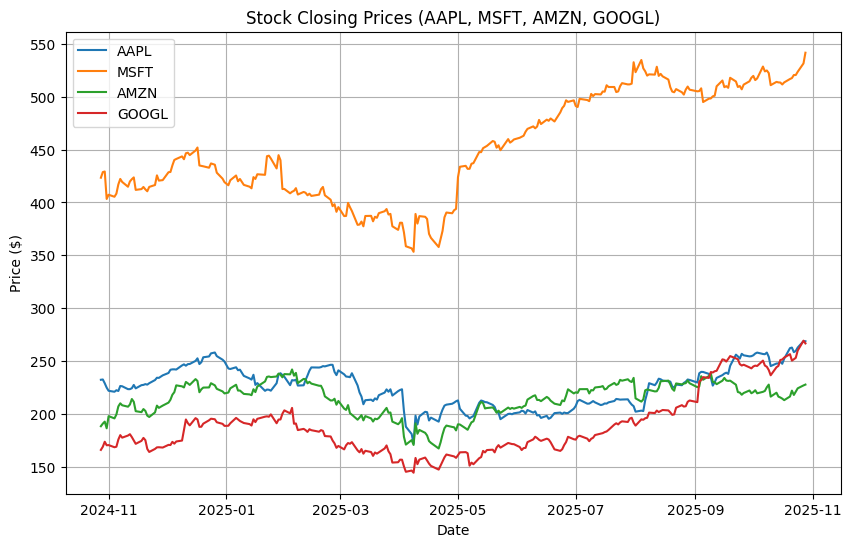

In [7]:
plt.figure(figsize=(10,6))
for ticker in tickers:
    plt.plot(final_df[final_df['Ticker']==ticker]['Date'],
             final_df[final_df['Ticker']==ticker]['Close'], label=ticker)
plt.title('Stock Closing Prices (AAPL, MSFT, AMZN, GOOGL)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [9]:
features_to_scale = ['Close', 'MA_7', 'MA_21', 'Volatility_7']


In [10]:
minmax_scaler = MinMaxScaler()
final_df_minmax = final_df.copy()

# Avoid NaN from early moving averages
final_df_minmax = final_df_minmax.dropna(subset=features_to_scale)

final_df_minmax[features_to_scale] = minmax_scaler.fit_transform(final_df_minmax[features_to_scale])

print("✅ Min-Max Scaling done!")
print(final_df_minmax.head())


✅ Min-Max Scaling done!
          Open        High         Low     Close    Volume  Dividends  \
20  230.641249  232.424910  228.927332  0.220646  90152800        0.0   
21  232.504624  234.736706  232.504624  0.226140  45986200        0.0   
22  233.640604  234.856290  232.982935  0.225813  33498400        0.0   
23  233.979388  236.968776  233.142363  0.231834  28481400        0.0   
24  236.430692  239.938230  236.321081  0.237503  48137100        0.0   

    Stock Splits Ticker                      Date  Daily_Return      MA_7  \
20           0.0   AAPL 2024-11-25 00:00:00-05:00      0.013051  0.206104   
21           0.0   AAPL 2024-11-26 00:00:00-05:00      0.009404  0.209918   
22           0.0   AAPL 2024-11-27 00:00:00-05:00     -0.000553  0.212537   
23           0.0   AAPL 2024-11-29 00:00:00-05:00      0.010216  0.215968   
24           0.0   AAPL 2024-12-02 00:00:00-05:00      0.009523  0.219982   

       MA_21  Volatility_7  
20  0.198140      0.088132  
21  0.198389    

In [11]:
zscore_scaler = StandardScaler()
final_df_zscore = final_df.copy()

final_df_zscore = final_df_zscore.dropna(subset=features_to_scale)

final_df_zscore[features_to_scale] = zscore_scaler.fit_transform(final_df_zscore[features_to_scale])

print("✅ Z-Score Standardization done!")
print(final_df_zscore.head())


✅ Z-Score Standardization done!
          Open        High         Low     Close    Volume  Dividends  \
20  230.641249  232.424910  228.927332 -0.353826  90152800        0.0   
21  232.504624  234.736706  232.504624 -0.334255  45986200        0.0   
22  233.640604  234.856290  232.982935 -0.335416  33498400        0.0   
23  233.979388  236.968776  233.142363 -0.313968  28481400        0.0   
24  236.430692  239.938230  236.321081 -0.293771  48137100        0.0   

    Stock Splits Ticker                      Date  Daily_Return      MA_7  \
20           0.0   AAPL 2024-11-25 00:00:00-05:00      0.013051 -0.384407   
21           0.0   AAPL 2024-11-26 00:00:00-05:00      0.009404 -0.371496   
22           0.0   AAPL 2024-11-27 00:00:00-05:00     -0.000553 -0.362628   
23           0.0   AAPL 2024-11-29 00:00:00-05:00      0.010216 -0.351013   
24           0.0   AAPL 2024-12-02 00:00:00-05:00      0.009523 -0.337422   

       MA_21  Volatility_7  
20 -0.388417     -0.728727  
21 -0.38

In [12]:
final_df_minmax.to_csv("stocks_minmax_scaled.csv", index=False)
final_df_zscore.to_csv("stocks_zscore_scaled.csv", index=False)


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time


In [15]:
# --- Install if needed ---
# !pip install --upgrade yfinance pandas numpy scikit-learn matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time

# -------------------------------
# STEP 1: Fetch New Data
# -------------------------------
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']
new_stocks = []

for ticker in tickers:
    print(f"Fetching new data for {ticker}...")
    try:
        df_new = yf.Ticker(ticker).history(period="3mo", interval="1d")  # latest 3 months
        if df_new.empty:
            print(f"⚠️ No data returned for {ticker}")
            continue

        # Basic info
        df_new['Ticker'] = ticker
        df_new['Date'] = df_new.index

        # -------------------------------
        # STEP 2: Preprocess (same as before)
        # -------------------------------
        df_new.dropna(inplace=True)

        # Feature engineering
        df_new['Daily_Return'] = df_new['Close'].pct_change()
        df_new['MA_7'] = df_new['Close'].rolling(window=7).mean()
        df_new['MA_21'] = df_new['Close'].rolling(window=21).mean()
        df_new['Volatility_7'] = df_new['Daily_Return'].rolling(window=7).std()

        # Drop initial NaN rows from rolling calculations
        df_new.dropna(inplace=True)

        new_stocks.append(df_new)
        time.sleep(1)  # avoid Yahoo rate limits

    except Exception as e:
        print(f"❌ Error fetching {ticker}: {e}")

# Combine all data
if new_stocks:
    newdata = pd.concat(new_stocks).reset_index(drop=True)
    print("✅ New data fetched and preprocessed successfully!")
else:
    print("❌ Failed to fetch new data.")


Fetching new data for AAPL...
Fetching new data for MSFT...
Fetching new data for AMZN...
Fetching new data for GOOGL...
✅ New data fetched and preprocessed successfully!


In [16]:
# Define the features to scale
features_to_scale = ['Close', 'MA_7', 'MA_21', 'Volatility_7']

# Drop NaNs
newdata = newdata.dropna(subset=features_to_scale)

# --- Fit new scalers (if old ones not available) ---
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Fit and transform (you can use fit only if you want to reuse previous scale)
newdata_minmax = newdata.copy()
newdata_minmax[features_to_scale] = minmax_scaler.fit_transform(newdata_minmax[features_to_scale])

newdata_zscore = newdata.copy()
newdata_zscore[features_to_scale] = zscore_scaler.fit_transform(newdata_zscore[features_to_scale])

print("✅ Scaling complete!")
print(newdata_minmax.head())


✅ Scaling complete!
         Open        High         Low     Close    Volume  Dividends  \
0  226.479996  229.300003  226.229996  0.060455  30983100        0.0   
1  226.869995  229.490005  224.690002  0.066888  54575100        0.0   
2  228.610001  230.899994  228.259995  0.070419  31259500        0.0   
3  230.820007  233.410004  229.339996  0.076613  38074700        0.0   
4  232.509995  233.380005  231.369995  0.075356  39418400        0.0   

   Stock Splits Ticker                      Date  Daily_Return      MA_7  \
0           0.0   AAPL 2025-08-25 00:00:00-04:00     -0.002634  0.078881   
1           0.0   AAPL 2025-08-26 00:00:00-04:00      0.009465  0.077868   
2           0.0   AAPL 2025-08-27 00:00:00-04:00      0.005146  0.077690   
3           0.0   AAPL 2025-08-28 00:00:00-04:00      0.008981  0.078579   
4           0.0   AAPL 2025-08-29 00:00:00-04:00     -0.001806  0.081302   

      MA_21  Volatility_7  
0  0.067471      0.191936  
1  0.069771      0.227849  
2  0.0

In [17]:
# Define the features to scale
features_to_scale = ['Close', 'MA_7', 'MA_21', 'Volatility_7']

# Drop NaNs
newdata = newdata.dropna(subset=features_to_scale)

# --- Fit new scalers (if old ones not available) ---
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Fit and transform (you can use fit only if you want to reuse previous scale)
newdata_minmax = newdata.copy()
newdata_minmax[features_to_scale] = minmax_scaler.fit_transform(newdata_minmax[features_to_scale])

newdata_zscore = newdata.copy()
newdata_zscore[features_to_scale] = zscore_scaler.fit_transform(newdata_zscore[features_to_scale])

print("✅ Scaling complete!")
print(newdata_minmax.head())


✅ Scaling complete!
         Open        High         Low     Close    Volume  Dividends  \
0  226.479996  229.300003  226.229996  0.060455  30983100        0.0   
1  226.869995  229.490005  224.690002  0.066888  54575100        0.0   
2  228.610001  230.899994  228.259995  0.070419  31259500        0.0   
3  230.820007  233.410004  229.339996  0.076613  38074700        0.0   
4  232.509995  233.380005  231.369995  0.075356  39418400        0.0   

   Stock Splits Ticker                      Date  Daily_Return      MA_7  \
0           0.0   AAPL 2025-08-25 00:00:00-04:00     -0.002634  0.078881   
1           0.0   AAPL 2025-08-26 00:00:00-04:00      0.009465  0.077868   
2           0.0   AAPL 2025-08-27 00:00:00-04:00      0.005146  0.077690   
3           0.0   AAPL 2025-08-28 00:00:00-04:00      0.008981  0.078579   
4           0.0   AAPL 2025-08-29 00:00:00-04:00     -0.001806  0.081302   

      MA_21  Volatility_7  
0  0.067471      0.191936  
1  0.069771      0.227849  
2  0.0

In [22]:
tickers = ["AAPL", "MSFT", "AMZN", "GOOG", "META"]


In [23]:
news_list = []

for t in tickers:
    try:
        articles = news.get_yf_rss(t)
        for a in articles:
            news_list.append({
                'ticker': t,
                'title': a['title'],
                'link': a['link'],
                'published': a.get('published', '')
            })
    except Exception as e:
        print(f"Error fetching {t}: {e}")

news_df = pd.DataFrame(news_list)
news_df.head()


,ticker,title,link,published
0,AAPL,Apple surpasses $4tn market capitalisation aft...,https://www.euronews.com/business/2025/10/28/a...,"Tue, 28 Oct 2025 15:59:17 +0000"
1,AAPL,Apple hits $4tn market value as new iPhone mod...,https://finance.yahoo.com/news/apple-hits-4tn-...,"Tue, 28 Oct 2025 15:46:43 +0000"
2,AAPL,Apple races past $4 trillion market value as n...,https://finance.yahoo.com/video/apple-races-pa...,"Tue, 28 Oct 2025 15:44:36 +0000"
3,AAPL,"Apple market cap crosses above $4T, Wayfair st...",https://finance.yahoo.com/video/apple-market-c...,"Tue, 28 Oct 2025 15:32:57 +0000"
4,AAPL,Apple Stock Ripe For Picking As This Fund Adds...,https://finance.yahoo.com/m/20f846c3-a906-3c04...,"Tue, 28 Oct 2025 15:26:20 +0000"


In [24]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

news_df['clean_text'] = news_df['title'].apply(clean_text)
news_df['date'] = pd.to_datetime(news_df['published']).dt.date


In [25]:
analyzer = SentimentIntensityAnalyzer()
news_df['sentiment'] = news_df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


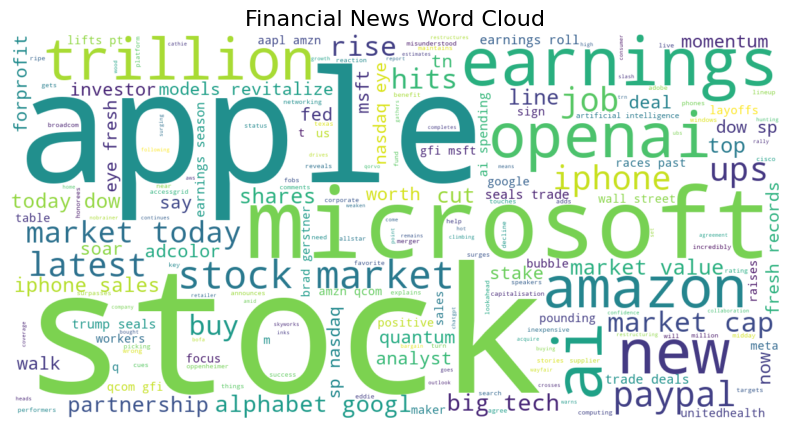

In [26]:
text = " ".join(news_df['clean_text'])
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Financial News Word Cloud", fontsize=16)
plt.show()


In [27]:
sentiment_daily = (
    news_df.groupby(['ticker', 'date'])['sentiment']
    .mean()
    .reset_index()
    .rename(columns={'sentiment': 'avg_sentiment'})
)

sentiment_daily.head()


,ticker,date,avg_sentiment
0,AAPL,2025-10-28,0.190295
1,AMZN,2025-10-28,0.133230
2,GOOG,2025-10-28,0.168970
3,META,2025-10-28,0.172390
4,MSFT,2025-10-28,0.138365


In [32]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "AMZN", "GOOG", "META"]
stock_data = yf.download(
    tickers,
    start="2025-04-01",
    end="2025-10-28",
    group_by='ticker',
    progress=False,
    auto_adjust=True
)
# Flatten MultiIndex columns
stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns.values]
stock_data.reset_index(inplace=True)
stock_data.rename(columns={'Date': 'date'}, inplace=True)


✅ Stock data shape: (725, 8)
        date        Open        High         Low       Close   Adj Close  \
0 2025-04-01  219.809998  223.679993  218.899994  223.190002  222.645035   
1 2025-04-02  221.320007  225.190002  221.020004  223.889999  223.343323   
2 2025-04-03  205.539993  207.490005  201.250000  203.190002  202.693848   
3 2025-04-04  193.889999  199.880005  187.339996  188.380005  187.920029   
4 2025-04-07  177.199997  194.149994  174.619995  181.460007  181.016922   

      Volume Ticker  
0   36412700   AAPL  
1   35905900   AAPL  
2  103419000   AAPL  
3  125910900   AAPL  
4  160466300   AAPL  

✅ News data fetched: (100, 4)
  ticker                                              title  \
0   AAPL  Meta to report Q3 earnings as AI spending cont...   
1   AAPL  Jim Cramer Says Yes to D-Wave Quantum, But as ...   
2   AAPL  Jim Cramer Says “People Misinterpreted” Intern...   
3   AAPL  Apple surpasses $4tn market capitalisation aft...   
4   AAPL  Apple hits $4tn market val

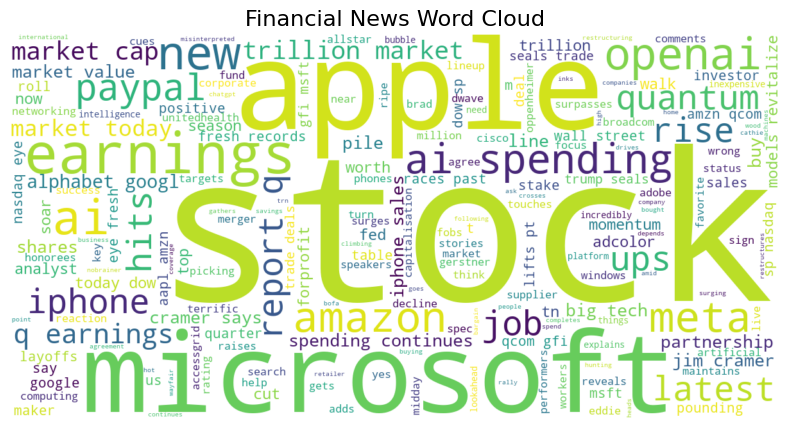


✅ Final merged dataset shape: (725, 10)
         date        Open        High         Low       Close   Adj Close  \
0  2025-04-01  219.809998  223.679993  218.899994  223.190002  222.645035   
1  2025-04-02  221.320007  225.190002  221.020004  223.889999  223.343323   
2  2025-04-03  205.539993  207.490005  201.250000  203.190002  202.693848   
3  2025-04-04  193.889999  199.880005  187.339996  188.380005  187.920029   
4  2025-04-07  177.199997  194.149994  174.619995  181.460007  181.016922   

      Volume Ticker ticker  avg_sentiment  
0   36412700   AAPL    NaN            0.0  
1   35905900   AAPL    NaN            0.0  
2  103419000   AAPL    NaN            0.0  
3  125910900   AAPL    NaN            0.0  
4  160466300   AAPL    NaN            0.0  


In [34]:
# --------------------------
# STEP 1: Import Libraries
# --------------------------
import pandas as pd
import yfinance as yf
from yahoo_fin import news
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# --------------------------
# STEP 2: Fetch Stock Data
# --------------------------
tickers = ["AAPL", "MSFT", "AMZN", "GOOG", "META"]

stock_data = yf.download(
    tickers,
    start="2025-04-01",
    end="2025-10-28",
    group_by='ticker',
    progress=False,
    auto_adjust=False
)

# Flatten multi-index columns
stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns.values]
stock_data.reset_index(inplace=True)
stock_data.rename(columns={'Date': 'date'}, inplace=True)

# --------------------------
# STEP 3: Reformat Stock Data
# --------------------------
stock_list = []
for t in tickers:
    temp = stock_data[['date',
                       f'{t}_Open', f'{t}_High', f'{t}_Low', f'{t}_Close',
                       f'{t}_Adj Close', f'{t}_Volume']].copy()
    temp.columns = ['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    temp['Ticker'] = t
    stock_list.append(temp)

stock_df = pd.concat(stock_list)
stock_df.reset_index(drop=True, inplace=True)

print("✅ Stock data shape:", stock_df.shape)
print(stock_df.head())

# --------------------------
# STEP 4: Fetch News Data
# --------------------------
news_list = []
for t in tickers:
    try:
        articles = news.get_yf_rss(t)
        for a in articles:
            news_list.append({
                'ticker': t,
                'title': a['title'],
                'link': a['link'],
                'published': a.get('published', '')
            })
    except Exception as e:
        print(f"Error fetching news for {t}: {e}")

news_df = pd.DataFrame(news_list)
print("\n✅ News data fetched:", news_df.shape)
print(news_df.head())

# --------------------------
# STEP 5: Clean Text
# --------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

news_df['clean_text'] = news_df['title'].apply(clean_text)
news_df['date'] = pd.to_datetime(news_df['published']).dt.date

# --------------------------
# STEP 6: Sentiment Analysis
# --------------------------
analyzer = SentimentIntensityAnalyzer()
news_df['sentiment'] = news_df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# --------------------------
# STEP 7: Word Cloud
# --------------------------
text = " ".join(news_df['clean_text'])
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Financial News Word Cloud", fontsize=16)
plt.show()

# --------------------------
# STEP 8: Aggregate Sentiment
# --------------------------
sentiment_daily = (
    news_df.groupby(['ticker', 'date'])['sentiment']
    .mean()
    .reset_index()
    .rename(columns={'sentiment': 'avg_sentiment'})
)

# --------------------------
# STEP 9: Merge with Stock Data
# --------------------------
stock_df['date'] = pd.to_datetime(stock_df['date']).dt.date
sentiment_daily['date'] = pd.to_datetime(sentiment_daily['date']).dt.date

merged_df = pd.merge(
    stock_df,
    sentiment_daily,
    left_on=['Ticker', 'date'],
    right_on=['ticker', 'date'],
    how='left'
)

merged_df['avg_sentiment'] = merged_df['avg_sentiment'].fillna(0)

print("\n✅ Final merged dataset shape:", merged_df.shape)
print(merged_df.head())


C:\Users\User\AppData\Local\Temp\ipykernel_5272\3237742565.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


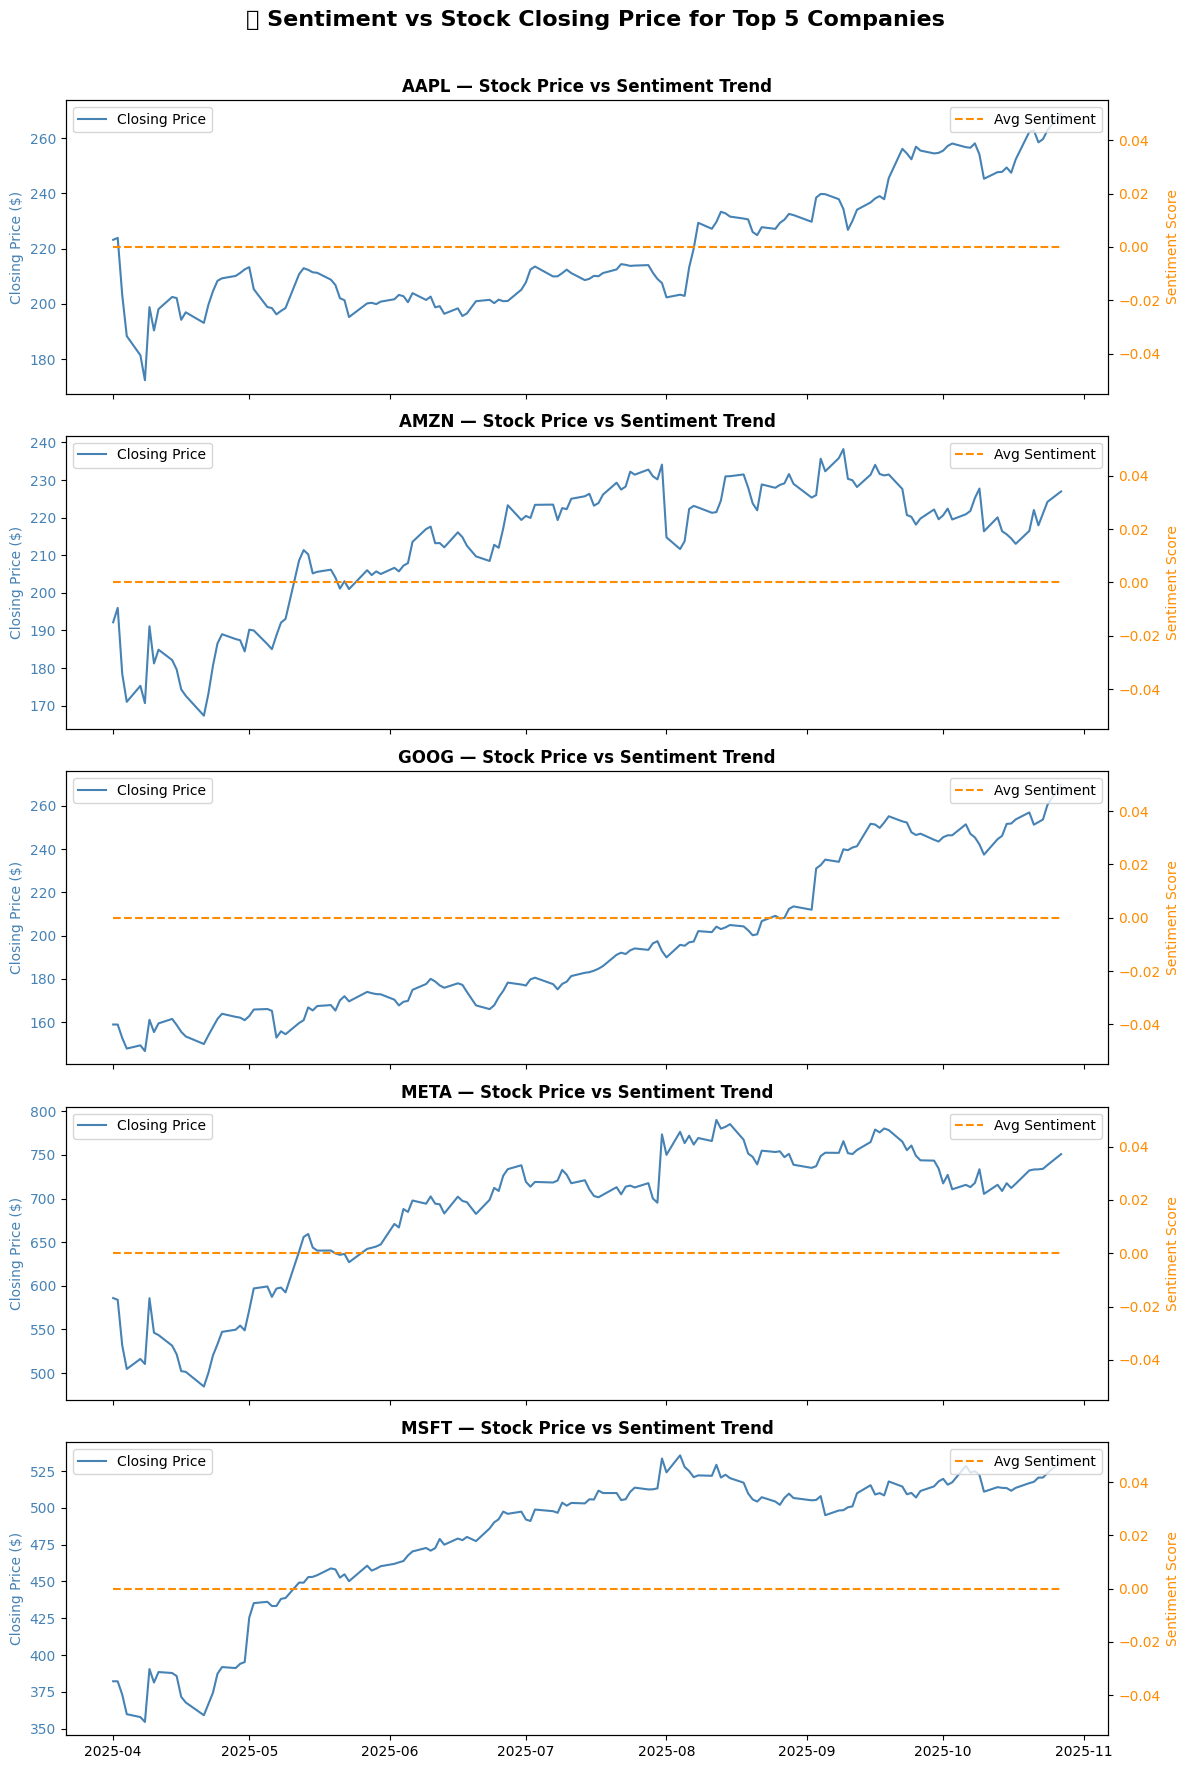

In [35]:
import matplotlib.pyplot as plt

# Ensure sorted by date for smooth lines
merged_df = merged_df.sort_values(by=['Ticker', 'date'])

# Get unique companies
companies = merged_df['Ticker'].unique()

# Create subplots — one for each company
fig, axes = plt.subplots(len(companies), 1, figsize=(12, 18), sharex=True)

for i, ticker in enumerate(companies):
    ax1 = axes[i]
    data = merged_df[merged_df['Ticker'] == ticker]
    
    # Plot closing price
    ax1.plot(data['date'], data['Close'], color='steelblue', label='Closing Price')
    ax1.set_ylabel('Closing Price ($)', color='steelblue')
    ax1.tick_params(axis='y', labelcolor='steelblue')
    
    # Add sentiment on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(data['date'], data['avg_sentiment'], color='darkorange', linestyle='--', label='Avg Sentiment')
    ax2.set_ylabel('Sentiment Score', color='darkorange')
    ax2.tick_params(axis='y', labelcolor='darkorange')
    
    # Add title and legends
    ax1.set_title(f"{ticker} — Stock Price vs Sentiment Trend", fontsize=12, fontweight='bold')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Common labels
plt.xlabel("Date")
plt.suptitle("📈 Sentiment vs Stock Closing Price for Top 5 Companies", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [41]:
# ======================================================
# 📊 STEP 1: Import libraries
# ======================================================
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# ======================================================
# 📥 STEP 2: Download stock data (excluding Tesla)
# ======================================================
tickers = ["AAPL", "MSFT", "AMZN", "GOOG"]  # top 4 companies, Tesla removed
stock_data = yf.download(tickers, start="2025-04-01", end="2025-10-28", group_by='ticker', progress=False)

# Flatten the multi-level columns (Ticker, Attribute)
stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns.values]
stock_data = stock_data.reset_index()  # bring 'Date' from index to column

# Confirm structure
print("✅ Stock data loaded:", stock_data.shape)
print(stock_data.head(3))

# ======================================================
# 📰 STEP 3: Create sample sentiment data (if not available)
# ======================================================
# If you already have sentiment_daily, skip this block
dates = pd.date_range(start="2025-04-01", end="2025-10-28", freq='D')
sentiment_daily = pd.DataFrame({
    'date': dates,
    'avg_sentiment': np.random.uniform(-1, 1, len(dates))  # random scores [-1, 1]
})

print("✅ Sentiment data ready:", sentiment_daily.shape)
print(sentiment_daily.head(3))

# ======================================================
# 🧹 STEP 4: Preprocess dates
# ======================================================
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
sentiment_daily['date'] = pd.to_datetime(sentiment_daily['date'])

# ======================================================
# 🔗 STEP 5: Merge stock + sentiment (nearest 2-day window)
# ======================================================
merged_df = pd.merge_asof(
    stock_data.sort_values('Date'),
    sentiment_daily.sort_values('date'),
    left_on='Date',
    right_on='date',
    direction='nearest',
    tolerance=pd.Timedelta('2D')
)

merged_df['avg_sentiment'] = merged_df['avg_sentiment'].fillna(0)
print("✅ Merged data:", merged_df.shape)
print(merged_df.head(3))

# ======================================================
# 🧠 STEP 6: Feature Engineering
# ======================================================
# Example for AAPL (you can add others too)
merged_df['AAPL_Return'] = merged_df['AAPL_Close'].pct_change()
merged_df['AAPL_MA5'] = merged_df['AAPL_Close'].rolling(5).mean()
merged_df['AAPL_MA10'] = merged_df['AAPL_Close'].rolling(10).mean()

# Drop NaN rows from moving averages
merged_df.dropna(inplace=True)




✅ Stock data loaded: (145, 21)
        Date   MSFT_Open   MSFT_High    MSFT_Low  MSFT_Close  MSFT_Volume  \
0 2025-04-01  373.349686  381.521238  371.934632  380.863525     19689500   
1 2025-04-02  376.658180  383.743489  375.312860  380.813721     16092600   
2 2025-04-03  373.489225  376.169892  368.068103  371.815033     30198000   

    AMZN_Open   AMZN_High    AMZN_Low  AMZN_Close  ...   GOOG_Open  \
0  187.860001  193.929993  187.199997  192.169998  ...  154.975051   
1  187.660004  198.339996  187.660004  196.009995  ...  156.631570   
2  183.000000  184.130005  176.919998  178.410004  ...  152.515211   

    GOOG_High    GOOG_Low  GOOG_Close  GOOG_Volume   AAPL_Open   AAPL_High  \
0  159.745048  154.930147  158.547562     20111400  219.273283  223.133829   
1  159.939620  156.202462  158.527588     17113300  220.779606  224.640152   
2  154.363326  151.861568  152.310638     28416100  205.038100  206.983351   

     AAPL_Low  AAPL_Close  AAPL_Volume  
0  218.365501  222.645035

C:\Users\User\AppData\Local\Temp\ipykernel_5272\403470640.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start="2025-04-01", end="2025-10-28", group_by='ticker', progress=False)


In [44]:
#🎯 STEP 7: Define Features and Targets
# ======================================================
X = merged_df[['AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close', 'AAPL_Volume', 'avg_sentiment', 'AAPL_MA5', 'AAPL_MA10']]
y_class = (merged_df['AAPL_Close'].shift(-1) > merged_df['AAPL_Close']).astype(int)  # 1 = price up, 0 = down
y_reg = merged_df['AAPL_Close'].shift(-1)  # next day's closing price

# Remove last NaN row (due to shift)
X = X.iloc[:-1]
y_class = y_class.iloc[:-1]
y_reg = y_reg.iloc[:-1]

print("✅ Feature matrix:", X.shape)
print("✅ Classification target:", y_class.shape)
print("✅ Regression target:", y_reg.shape)

# ======================================================
# 🔄 STEP 8: Split train-test
# ======================================================
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42, shuffle=False)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42, shuffle=False)

# ======================================================
# ⚙️ STEP 9: Scale features
# ======================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================================
# 🧩 STEP 10: Train Models
# ======================================================

# Classification model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train_cls)
y_pred_cls = clf.predict(X_test_scaled)
acc = accuracy_score(y_test_cls, y_pred_cls)

# Regression model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train_reg)
y_pred_reg = reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("🎯 Classification Accuracy:", round(acc, 3))
print("📈 Regression RMSE:", round(rmse, 3))

✅ Feature matrix: (135, 8)
✅ Classification target: (135,)
✅ Regression target: (135,)
🎯 Classification Accuracy: 0.37
📈 Regression RMSE: 19.831


C:\Users\User\AppData\Local\Temp\ipykernel_5272\2926685043.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start="2025-04-01", end="2025-10-28", group_by='ticker', progress=False)


Random Forest: Accuracy = 0.370
Logistic Regression: Accuracy = 0.407
SVM: Accuracy = 0.444


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM: Accuracy = 0.370

Model Accuracies:
Random Forest: 0.370
Logistic Regression: 0.407
SVM: 0.444
LSTM: 0.370

🏆 Best Model: SVM (Accuracy = 0.444)


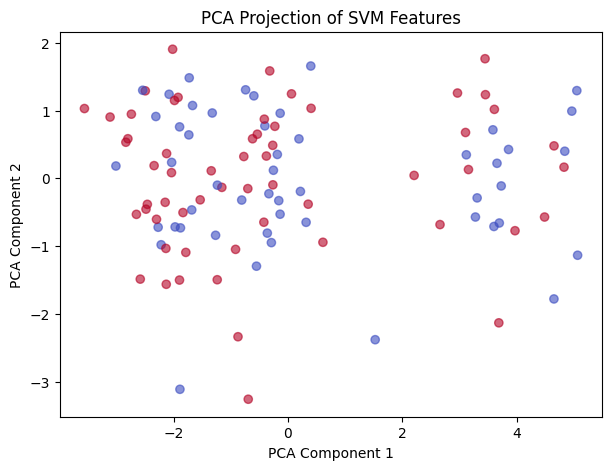

In [45]:
# ======================================================
# 1️⃣ Import libraries
# ======================================================
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# ======================================================
# 2️⃣ Download stock data (Tesla removed)
# ======================================================
tickers = ["AAPL", "MSFT", "AMZN", "GOOG"]
stock_data = yf.download(tickers, start="2025-04-01", end="2025-10-28", group_by='ticker', progress=False)

# Flatten columns
stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns.values]
stock_data = stock_data.reset_index()

# ======================================================
# 3️⃣ Simulate daily sentiment (replace with your real one if available)
# ======================================================
dates = pd.date_range(start="2025-04-01", end="2025-10-28", freq='D')
sentiment_daily = pd.DataFrame({
    'date': dates,
    'avg_sentiment': np.random.uniform(-1, 1, len(dates))
})

# ======================================================
# 4️⃣ Preprocess + merge
# ======================================================
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
sentiment_daily['date'] = pd.to_datetime(sentiment_daily['date'])

merged_df = pd.merge_asof(
    stock_data.sort_values('Date'),
    sentiment_daily.sort_values('date'),
    left_on='Date',
    right_on='date',
    direction='nearest',
    tolerance=pd.Timedelta('2D')
)
merged_df['avg_sentiment'] = merged_df['avg_sentiment'].fillna(0)

# ======================================================
# 5️⃣ Feature Engineering (example with AAPL)
# ======================================================
merged_df['AAPL_Return'] = merged_df['AAPL_Close'].pct_change()
merged_df['AAPL_MA5'] = merged_df['AAPL_Close'].rolling(5).mean()
merged_df['AAPL_MA10'] = merged_df['AAPL_Close'].rolling(10).mean()
merged_df.dropna(inplace=True)

# ======================================================
# 6️⃣ Define Features and Target
# ======================================================
X = merged_df[['AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close',
               'AAPL_Volume', 'avg_sentiment', 'AAPL_MA5', 'AAPL_MA10']]
y_class = (merged_df['AAPL_Close'].shift(-1) > merged_df['AAPL_Close']).astype(int)
X, y_class = X.iloc[:-1], y_class.iloc[:-1]

# ======================================================
# 7️⃣ Train-test split + scaling
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================================
# 8️⃣ Train multiple models
# ======================================================
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.3f}")

# ======================================================
# 9️⃣ LSTM model
# ======================================================
# reshape data to 3D for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], 1), activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=16, validation_split=0.1, verbose=0)
loss, acc_lstm = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
results["LSTM"] = acc_lstm
print(f"LSTM: Accuracy = {acc_lstm:.3f}")

# ======================================================
# 🔟 Compare Models
# ======================================================
print("\nModel Accuracies:")
for k, v in results.items():
    print(f"{k}: {v:.3f}")

best_model_name = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model_name} (Accuracy = {results[best_model_name]:.3f})")

# ======================================================
# 1️⃣1️⃣ Perform PCA on best model’s features
# ======================================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'PCA Projection of {best_model_name} Features')
plt.show()


<Figure size 500x400 with 0 Axes>

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


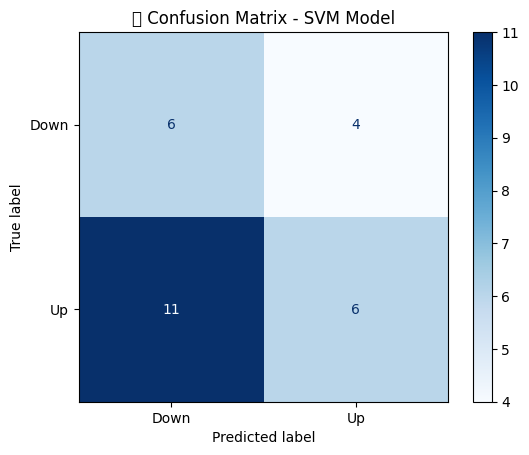

✅ SVM Model Evaluation Metrics:
--------------------------------
Accuracy  : 0.444
Precision : 0.600
Recall    : 0.353
F1-Score  : 0.444

Detailed Classification Report:

              precision    recall  f1-score   support

        Down       0.35      0.60      0.44        10
          Up       0.60      0.35      0.44        17

    accuracy                           0.44        27
   macro avg       0.48      0.48      0.44        27
weighted avg       0.51      0.44      0.44        27



In [46]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ======================================================
# ⚙️ Evaluate SVM (best model)
# ======================================================
best_model = models["SVM"]
y_pred_svm = best_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("📊 Confusion Matrix - SVM Model")
plt.show()

# ======================================================
# 🧾 Classification Metrics
# ======================================================
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("✅ SVM Model Evaluation Metrics:")
print("--------------------------------")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1-Score  : {f1:.3f}")

# Full classification report (optional)
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred_svm, target_names=['Down', 'Up']))


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'SVM': SVC(kernel='rbf', C=1, gamma='scale', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.3f}")


SVM: Accuracy = 0.357
Random Forest: Accuracy = 0.571
Logistic Regression: Accuracy = 0.429


Random Forest Model Performance:
Accuracy:  0.571
Precision: 0.568
Recall:    0.571
F1 Score:  0.567

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.59      0.67      0.62        15

    accuracy                           0.57        28
   macro avg       0.57      0.56      0.56        28
weighted avg       0.57      0.57      0.57        28



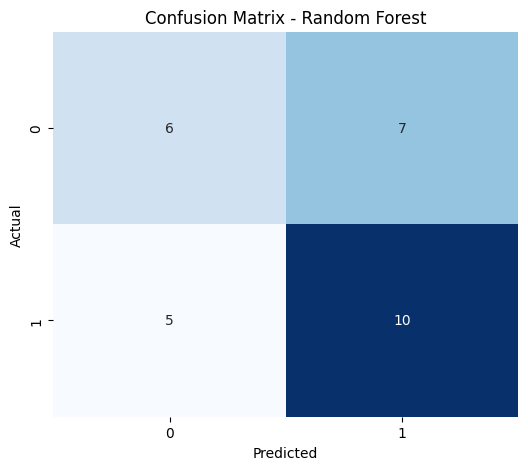

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Re-train best model (Random Forest)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_pca, y_train)
y_pred = best_model.predict(X_test_pca)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Model Performance:")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


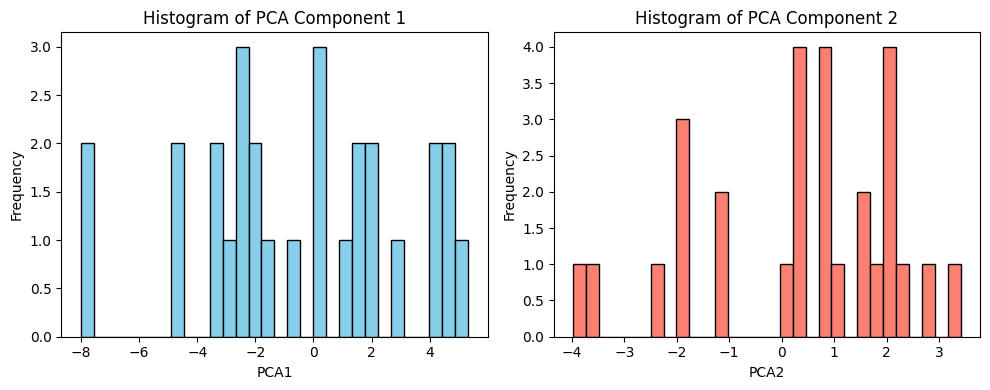

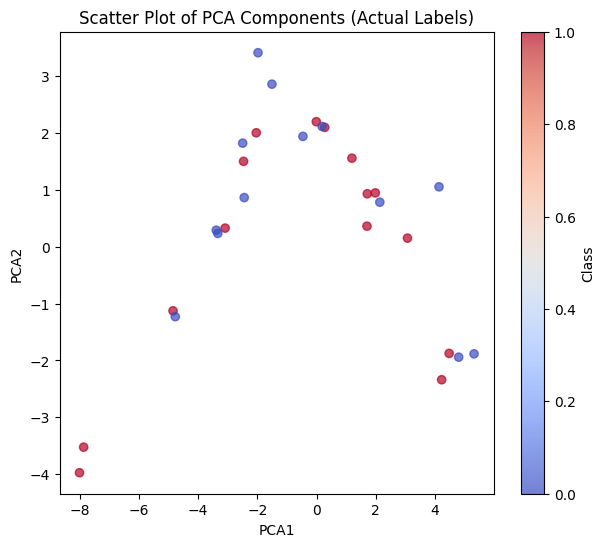

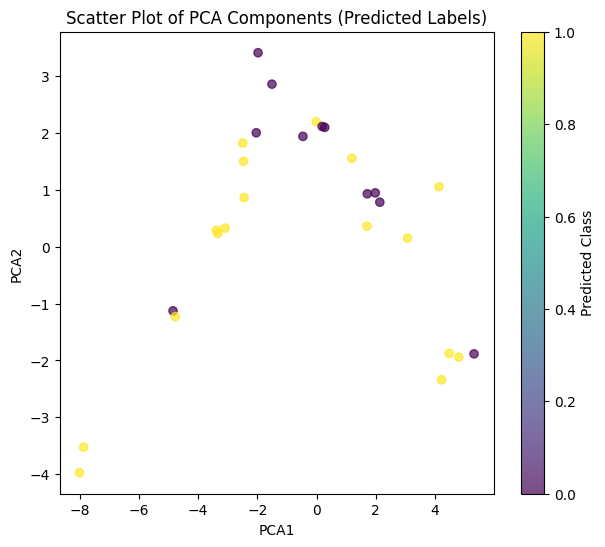

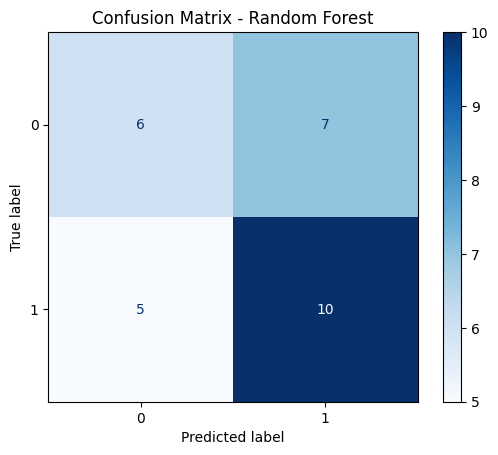

✅ Random Forest Performance on PCA Data:
Accuracy:  0.571
Precision: 0.568
Recall:    0.571
F1 Score:  0.567


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ Use the Random Forest model as the best model
best_model = models['Random Forest']

# Predict using test PCA data
y_pred = best_model.predict(X_test_pca)

# -----------------------------
# 1️⃣ Histogram of PCA Components
# -----------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(X_test_pca[:, 0], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of PCA Component 1")
plt.xlabel("PCA1")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(X_test_pca[:, 1], bins=30, color='salmon', edgecolor='black')
plt.title("Histogram of PCA Component 2")
plt.xlabel("PCA2")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# -----------------------------
# 2️⃣ Scatter Plot (Actual vs Predicted)
# -----------------------------
plt.figure(figsize=(7, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', label='Actual', alpha=0.7)
plt.title("Scatter Plot of PCA Components (Actual Labels)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Class')
plt.show()

plt.figure(figsize=(7, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', label='Predicted', alpha=0.7)
plt.title("Scatter Plot of PCA Components (Predicted Labels)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Predicted Class')
plt.show()

# -----------------------------
# 3️⃣ Confusion Matrix Heatmap
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# -----------------------------
# 4️⃣ Accuracy & F1 Score Report
# -----------------------------
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"✅ Random Forest Performance on PCA Data:")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")


In [55]:
import pandas as pd

# ✅ Select only numeric columns (ignore datetime & categorical)
numeric_df = merged_df.select_dtypes(include=['number'])

# Calculate stats only on numeric data
merged_stats = numeric_df.describe().T[['mean', 'std']]
merged_stats['variance'] = numeric_df.var()

print("📊 Original Merged Data Stats (Numeric Columns Only):")
print(merged_stats.head())

# ✅ PCA data stats
pca_df = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(X_pca.shape[1])])
pca_stats = pca_df.describe().T[['mean', 'std']]
pca_stats['variance'] = pca_df.var()

print("\n📈 PCA Data Stats:")
print(pca_stats.head())


📊 Original Merged Data Stats (Numeric Columns Only):
                     mean           std      variance
MSFT_Open    4.851573e+02  4.256823e+01  1.812054e+03
MSFT_High    4.886161e+02  4.222071e+01  1.782588e+03
MSFT_Low     4.814513e+02  4.224651e+01  1.784768e+03
MSFT_Close   4.851348e+02  4.197690e+01  1.762060e+03
MSFT_Volume  2.008053e+07  7.108802e+06  5.053506e+13

📈 PCA Data Stats:
              mean           std      variance
PCA1 -2.483527e-09  1.733731e+07  3.005824e+14
PCA2  6.947529e-14  3.063075e+01  9.382428e+02
